In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# the objective is to forecast the state wise sales

df=pd.read_excel('C:\\Users\\Abhishekh\\Downloads\\Sales_Forecast_Data.xlsx',header=0,index_col=None)

In [3]:
df=pd.DataFrame.copy(df) # creating copy of data frame

In [4]:
df.duplicated().sum() # count of duplicate

11968

In [5]:
df2=df.drop_duplicates() # deleting exact duplicate

In [6]:
df2.describe(include='all')

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
count,218184,218184,218184,218184,218184,218184,218184.000000
unique,4,12,5,4,142,47,NaN
top,2016-2017,Nov,Uttar Pradesh,Insecticides,Karnal,ABC Manufacturing,NaN
freq,64314,22669,122644,56298,3142,26443,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,743.528548
std,NaN,NaN,NaN,NaN,NaN,NaN,2316.652667
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,310.500000


In [7]:
df3=df2[df2['VALUE']>0] # only taking value pesticide

In [8]:
df3.describe(include='all')

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
count,84563,84563,84563,84563,84563,84563,84563.000000
unique,4,12,5,4,142,30,NaN
top,2016-2017,Nov,Uttar Pradesh,Insecticides,Karnal,ABC Manufacturing,NaN
freq,26843,9389,46355,41538,1508,16599,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1918.404418
std,NaN,NaN,NaN,NaN,NaN,NaN,3404.917503
min,NaN,NaN,NaN,NaN,NaN,NaN,0.135000
25%,NaN,NaN,NaN,NaN,NaN,NaN,166.050000
50%,NaN,NaN,NaN,NaN,NaN,NaN,659.340000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2159.865000


In [9]:
df3

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.000
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.710
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.000
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.000
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.590
...,...,...,...,...,...,...,...
230116,2016-2017,Mar,Punjab,Bactericides,Sangrur,cynoid,95.445
230139,2016-2017,Aug,Uttar Pradesh,Bactericides,Jyotiba Phule Nagar,scire,13.500
230141,2016-2017,Aug,Uttar Pradesh,Bactericides,Kanpur Nagar,scire,270.810
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.750


In [10]:
df3.loc[((df3.MONTH=='Jan')|(df3.MONTH=='Feb')|(df3.MONTH=='Mar')), 'Month-Year'] = '1'+"-"+df3.MONTH+"-"+df3.FIN_YEAR.str[5:]
df3.loc[~((df3.MONTH=='Jan')|(df3.MONTH=='Feb')|(df3.MONTH=='Mar')), 'Month-Year'] = '1'+"-"+df3.MONTH+"-"+df3.FIN_YEAR.str[:4]
# changing FIn-Year in to date date wise

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
df3

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Month-Year
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.000,1-Nov-2014
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.710,1-Nov-2014
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.000,1-Nov-2014
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.000,1-Nov-2014
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.590,1-Nov-2014
...,...,...,...,...,...,...,...,...
230116,2016-2017,Mar,Punjab,Bactericides,Sangrur,cynoid,95.445,1-Mar-2017
230139,2016-2017,Aug,Uttar Pradesh,Bactericides,Jyotiba Phule Nagar,scire,13.500,1-Aug-2016
230141,2016-2017,Aug,Uttar Pradesh,Bactericides,Kanpur Nagar,scire,270.810,1-Aug-2016
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.750,1-Dec-2016


In [12]:
for i in df3.columns:
    print({i:df3[i].unique()}) # getting unique

{'FIN_YEAR': array(['2014-2015', '2015-2016', '2016-2017', '2017-2018'], dtype=object)}
{'MONTH': array(['Nov', 'Dec', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Apr', 'Feb',
       'May', 'Jan', 'Mar'], dtype=object)}
{'STATE': array(['Haryana', 'Himachal Pradesh', 'Punjab', 'Uttar Pradesh',
       'Uttarakhand'], dtype=object)}
{'FG': array(['Insecticides', 'Herbicides', 'Rodenticides', 'Bactericides'],
      dtype=object)}
{'DISTRICT': array(['Rohtak', 'Rewari', 'Gurgaon', 'Mewat', 'Palwal', 'Kurukshetra',
       'Kaithal', 'Fatehabad', 'Sirsa', 'Hisar', 'Bhiwani', 'Yamunanagar',
       'Karnal', 'Panipat', 'Jind', 'Sonipat', 'Ambala', 'Mahendragarh',
       'Faridabad', 'Panchkula', 'Sirmaur', 'Shimla', 'Kinnaur', 'Kangra',
       'Kullu', 'Mandi', 'Hamirpur', 'Bilaspur', 'Solan', 'Chamba',
       'Lahul And Spiti', 'Una', 'Jhajjar', 'Muktsar', 'Bathinda',
       'Mansa', 'Patiala', 'Amritsar', 'Tarn Taran', 'Sangrur',
       'Gurdaspur', 'Kapurthala', 'Jalandhar', 'Hoshiarpur', 'Nawansha

In [13]:
# Converting all the categorical names in FG to Pesticides ( Single Category)
df3["FG"].replace({"Bactericides": "Pesticides", "Insecticides": "Pesticides",
                    "Herbicides": "Pesticides","Rodenticides": "Pesticides"}, inplace=True)

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
df3

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Month-Year
0,2014-2015,Nov,Haryana,Pesticides,Rohtak,monous,675.000,1-Nov-2014
1,2014-2015,Nov,Haryana,Pesticides,Rewari,monous,73.710,1-Nov-2014
2,2014-2015,Nov,Haryana,Pesticides,Gurgaon,monous,405.000,1-Nov-2014
3,2014-2015,Nov,Haryana,Pesticides,Mewat,monous,1188.000,1-Nov-2014
4,2014-2015,Nov,Haryana,Pesticides,Palwal,monous,5188.590,1-Nov-2014
...,...,...,...,...,...,...,...,...
230116,2016-2017,Mar,Punjab,Pesticides,Sangrur,cynoid,95.445,1-Mar-2017
230139,2016-2017,Aug,Uttar Pradesh,Pesticides,Jyotiba Phule Nagar,scire,13.500,1-Aug-2016
230141,2016-2017,Aug,Uttar Pradesh,Pesticides,Kanpur Nagar,scire,270.810,1-Aug-2016
230148,2016-2017,Dec,Uttar Pradesh,Pesticides,Bulandshahr,disescent,6.750,1-Dec-2016


<AxesSubplot:xlabel='STATE', ylabel='VALUE'>

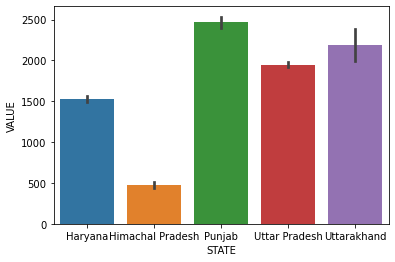

In [15]:
import seaborn as sns
sns.barplot(x='STATE',y='VALUE',data=df3,estimator=np.mean) # state wise sales value here we can see punjab has maximum sales

In [16]:
df3.groupby(df3['STATE']).mean()['VALUE'].sort_values() # the count of sales

STATE
Himachal Pradesh     476.851038
Haryana             1528.380358
Uttar Pradesh       1948.606461
Uttarakhand         2185.310866
Punjab              2467.246392
Name: VALUE, dtype: float64

In [17]:
df3.dtypes

FIN_YEAR       object
MONTH          object
STATE          object
FG             object
DISTRICT       object
COMPANY        object
VALUE         float64
Month-Year     object
dtype: object

In [18]:
df3['Y1']=df3['Month-Year'].apply(lambda x:x[6:]) # Splitting the month-year
                                                     # as it combine of  years-month-date with hypen
                                                     # Y1 column contains year

<ipython-input-18-a34e59cf085c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Y1']=df3['Month-Year'].apply(lambda x:x[6:]) # Splitting the month-year


In [19]:
df3.head(10)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Month-Year,Y1
0,2014-2015,Nov,Haryana,Pesticides,Rohtak,monous,675.000,1-Nov-2014,2014
1,2014-2015,Nov,Haryana,Pesticides,Rewari,monous,73.710,1-Nov-2014,2014
2,2014-2015,Nov,Haryana,Pesticides,Gurgaon,monous,405.000,1-Nov-2014,2014
3,2014-2015,Nov,Haryana,Pesticides,Mewat,monous,1188.000,1-Nov-2014,2014
4,2014-2015,Nov,Haryana,Pesticides,Palwal,monous,5188.590,1-Nov-2014,2014
17,2014-2015,Dec,Haryana,Pesticides,Kurukshetra,cynoid,6622.965,1-Dec-2014,2014
18,2014-2015,Dec,Haryana,Pesticides,Kaithal,cynoid,7669.080,1-Dec-2014,2014
22,2014-2015,Dec,Haryana,Pesticides,Fatehabad,cynoid,398.250,1-Dec-2014,2014
23,2014-2015,Dec,Haryana,Pesticides,Sirsa,cynoid,7940.970,1-Dec-2014,2014
24,2014-2015,Dec,Haryana,Pesticides,Hisar,cynoid,7109.100,1-Dec-2014,2014


In [20]:
yearly_sales_data = pd.pivot_table(df3, values = "VALUE", 
        columns = "STATE", index = "Y1") # yearly sales data here we can see in 2016 uttrakhand was in the lead
# and in 2018 punjab sales was significantly lower compare to other states
# where as in 2014 to 2017 punjab sales was siginficantly high

In [21]:
yearly_sales_data # yearly sales 

STATE,Haryana,Himachal Pradesh,Punjab,Uttar Pradesh,Uttarakhand
Y1,,,,,
2014,2261.832475,876.627000,2631.940787,2066.899851,1903.208167
2015,2216.323120,902.340397,2668.077802,1995.803318,2192.223025
2016,919.904278,262.013256,2479.736052,1852.197145,2508.357195
2017,1599.476721,430.339142,2237.386579,1910.201587,2046.900301
2018,1876.153675,966.211364,1516.096003,2090.359994,2358.734211


<AxesSubplot:xlabel='Y1'>

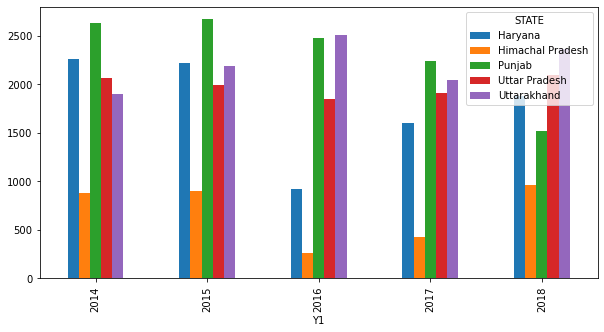

In [22]:
yearly_sales_data.plot.bar(figsize=(10,5))

In [23]:
Haryana=df3[df3['STATE']=='Haryana']# finding sales value for haryana

In [24]:
Haryana=Haryana[['Month-Year','VALUE']]

In [25]:
Haryana['Month-Year']=pd.to_datetime(Haryana['Month-Year']) # converting date in date time format

In [26]:
Haryana.dtypes

Month-Year    datetime64[ns]
VALUE                float64
dtype: object

In [27]:
Haryana.describe(include='all')

<ipython-input-27-054a81697a06>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Haryana.describe(include='all')


,Month-Year,VALUE
count,18323,18323.000000
unique,46,NaN
top,2016-11-01 00:00:00,NaN
freq,950,NaN
first,2014-04-01 00:00:00,NaN
last,2018-01-01 00:00:00,NaN
mean,NaN,1528.380358
std,NaN,2670.150006
min,NaN,0.135000
25%,NaN,135.000000


In [28]:
Haryana=Haryana.sort_values('Month-Year',ascending=True)

In [29]:
Haryana=Haryana.groupby('Month-Year')['VALUE'].sum().reset_index()

In [30]:
Haryana

,Month-Year,VALUE
0,2014-04-01,2.139213e+05
1,2014-05-01,4.126341e+05
2,2014-06-01,5.628419e+05
3,2014-07-01,6.276602e+05
4,2014-08-01,4.917974e+05
5,2014-09-01,5.131802e+05
6,2014-10-01,6.192648e+05
7,2014-11-01,8.549993e+05
8,2014-12-01,9.443666e+05
9,2015-01-01,7.230763e+05


In [31]:
Haryana=Haryana.set_index('Month-Year')

In [32]:
y=Haryana['VALUE'].resample('M').mean() # resampling the  data monthly wise

In [33]:
y

Month-Year
2014-04-30    2.139213e+05
2014-05-31    4.126341e+05
2014-06-30    5.628419e+05
2014-07-31    6.276602e+05
2014-08-31    4.917974e+05
2014-09-30    5.131802e+05
2014-10-31    6.192648e+05
2014-11-30    8.549993e+05
2014-12-31    9.443666e+05
2015-01-31    7.230763e+05
2015-02-28    4.576372e+05
2015-03-31    3.400998e+05
2015-04-30    4.130530e+05
2015-05-31    5.885980e+05
2015-06-30    6.790427e+05
2015-07-31    6.748179e+05
2015-08-31    6.213131e+05
2015-09-30    7.232695e+05
2015-10-31    1.048749e+06
2015-11-30    8.711933e+05
2015-12-31    8.179664e+05
2016-01-31    4.674340e+05
2016-02-29    3.259217e+05
2016-03-31    4.610791e+05
2016-04-30    1.446598e+05
2016-05-31    4.306768e+05
2016-06-30    7.458247e+05
2016-07-31    5.906471e+05
2016-08-31    5.117920e+05
2016-09-30    7.231072e+05
2016-10-31    6.038983e+05
2016-11-30    8.917156e+05
2016-12-31    1.048521e+06
2017-01-31    6.446695e+05
2017-02-28    2.778085e+05
2017-03-31    3.996988e+05
2017-04-30    2.0

In [34]:
y.shape

(46,)

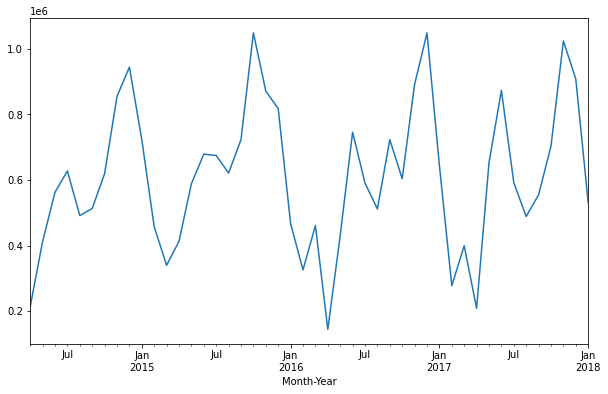

In [35]:
y.plot(figsize=(10,6))
plt.show()

In [36]:
train=y.loc[:'2017-03-31'] # we are taking first 3 years data for training
print(train.shape)
train

(36,)


Month-Year
2014-04-30    2.139213e+05
2014-05-31    4.126341e+05
2014-06-30    5.628419e+05
2014-07-31    6.276602e+05
2014-08-31    4.917974e+05
2014-09-30    5.131802e+05
2014-10-31    6.192648e+05
2014-11-30    8.549993e+05
2014-12-31    9.443666e+05
2015-01-31    7.230763e+05
2015-02-28    4.576372e+05
2015-03-31    3.400998e+05
2015-04-30    4.130530e+05
2015-05-31    5.885980e+05
2015-06-30    6.790427e+05
2015-07-31    6.748179e+05
2015-08-31    6.213131e+05
2015-09-30    7.232695e+05
2015-10-31    1.048749e+06
2015-11-30    8.711933e+05
2015-12-31    8.179664e+05
2016-01-31    4.674340e+05
2016-02-29    3.259217e+05
2016-03-31    4.610791e+05
2016-04-30    1.446598e+05
2016-05-31    4.306768e+05
2016-06-30    7.458247e+05
2016-07-31    5.906471e+05
2016-08-31    5.117920e+05
2016-09-30    7.231072e+05
2016-10-31    6.038983e+05
2016-11-30    8.917156e+05
2016-12-31    1.048521e+06
2017-01-31    6.446695e+05
2017-02-28    2.778085e+05
2017-03-31    3.996988e+05
Freq: M, Name: VA

In [37]:
test=y.loc['2017-04-30':] # remaining data  as testing
print(test.shape)
test

(10,)


Month-Year
2017-04-30    2.088747e+05
2017-05-31    6.527876e+05
2017-06-30    8.733336e+05
2017-07-31    5.918381e+05
2017-08-31    4.888409e+05
2017-09-30    5.549741e+05
2017-10-31    7.038687e+05
2017-11-30    1.024278e+06
2017-12-31    9.078298e+05
2018-01-31    5.309515e+05
Freq: M, Name: VALUE, dtype: float64

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)
C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


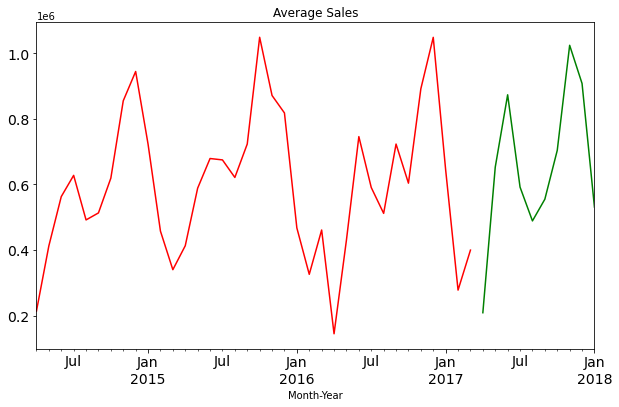

In [38]:
train.plot(figsize=(10,6),title='Average Sales',fontsize=14,C='red')
test.plot(figsize=(10,6),title='Average Sales',fontsize=14,C='green')
plt.show() # here we can see that seasonality in data and also trend from april to jan there is increase in sales

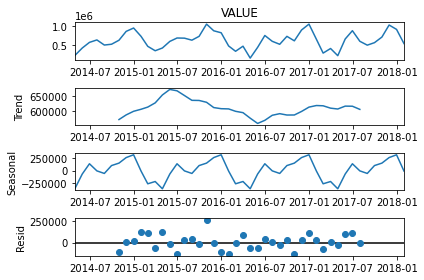

In [39]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show() # here we can see that financial yearly trend is present and then it follows seasonality

C:\Users\Abhishekh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Abhishekh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


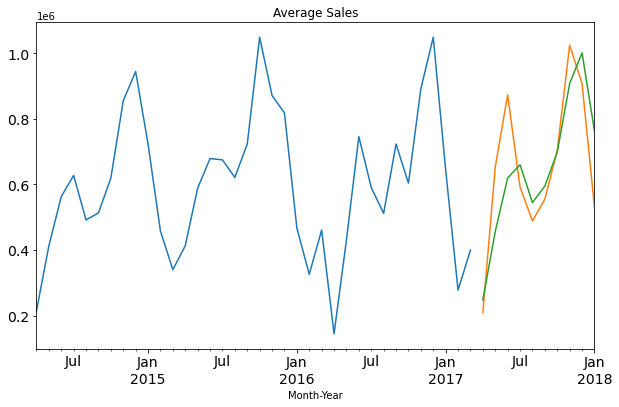

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing # so we are using tren + seasonality model which holt linear model
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [41]:
fit1.aic

880.4053458144255

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse) # rmse value

137910.90427800632


In [46]:
np.mean(np.abs(test-Holt_Winter_df['Holt_Winter'])/test)*100

17.4122581064241

In [44]:
Holt_Winter_df['Holt_Winter']

2017-04-30    2.477630e+05
2017-05-31    4.564210e+05
2017-06-30    6.194977e+05
2017-07-31    6.600760e+05
2017-08-31    5.447624e+05
2017-09-30    5.950922e+05
2017-10-31    6.986627e+05
2017-11-30    9.077449e+05
2017-12-31    1.001297e+06
2018-01-31    7.632296e+05
Freq: M, dtype: float64

C:\Users\Abhishekh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Abhishekh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


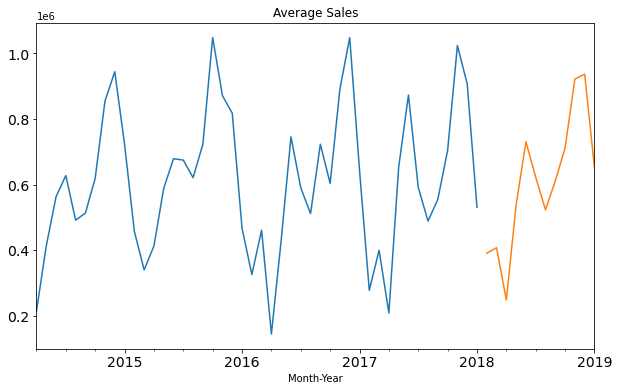

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-04-30'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [48]:
len(y)

46

## using seasonal arima for seasonal and trend analysis

In [49]:
import  pmdarima as pm

In [50]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=904.151, Time=1.59 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=896.146, Time=0.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=894.348, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=899.330, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=895.476, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=895.303, Time=0.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=893.532, Time=0.11 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=895.457, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=897.350, Time=0.77 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=896.292, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=894.533, Time=0.30 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=893.316, Time=0.11 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=899.069, Time=0.03 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=895.199, Time=0.26 sec
 ARIMA(0,1,2)(1,1,1)[12]         

In [51]:
model.aic()

893.3161801835461

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
               order=(0,1,2),seasonal_order=(1,1,0,12)).fit()

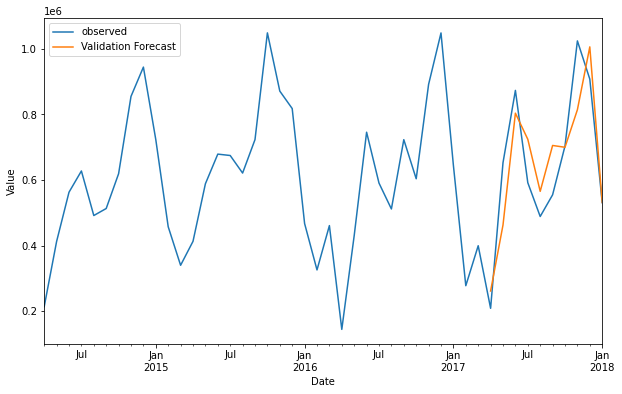

In [53]:
pred = model.get_prediction(start=pd.to_datetime('2017-04-30'))
#pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="Validation Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
plt.legend()
plt.show()

In [54]:
pred.predicted_mean

Month-Year
2017-04-30    2.616440e+05
2017-05-31    4.628929e+05
2017-06-30    8.038703e+05
2017-07-31    7.242673e+05
2017-08-31    5.655164e+05
2017-09-30    7.054316e+05
2017-10-31    6.999184e+05
2017-11-30    8.144122e+05
2017-12-31    1.006062e+06
2018-01-31    5.318954e+05
Freq: M, Name: predicted_mean, dtype: float64

In [55]:
Y_pred=pred.predicted_mean
Y_test=y['2017-04-30':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

119763.73526274039


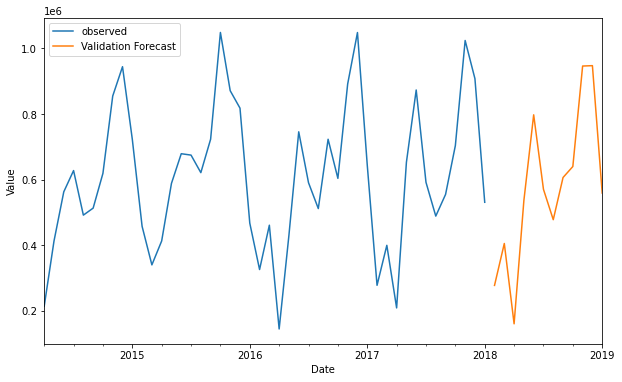

In [56]:
#pred = model.get_prediction(start=pd.to_datetime('2017-04-30'))
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="Validation Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
plt.legend()
plt.show()

In [57]:
np.mean(np.abs(Y_test-Y_pred)/test)*100 # mape and rmse is better with sarima

15.95277355569543

In [ ]:
pred.predicted_mean.to_excel('TimeSeriesOutput.xlsx',index=True)